In [ ]:
!chmod 600 kaggle/kaggle.json

In [ ]:
!mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

# New section

In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification

 94% 325M/346M [00:03<00:00, 139MB/s]
100% 346M/346M [00:03<00:00, 103MB/s]


In [ ]:
!unzip intel-image-classification.zip


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import cv2

building = cv2.imread('/content/seg_train/seg_train/buildings/10006.jpg')
building.shape

(150, 150, 3)

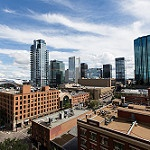

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(building)

In [ ]:
import os

class_folder_paths = ['seg_train/seg_train/' + x for x in os.listdir('seg_train/seg_train/')]
class_folder_paths

['seg_train/seg_train/sea',
 'seg_train/seg_train/mountain',
 'seg_train/seg_train/buildings',
 'seg_train/seg_train/glacier',
 'seg_train/seg_train/street',
 'seg_train/seg_train/forest']

In [ ]:
for class_folder_path in class_folder_paths:
  print('{0}: '.format(class_folder_path), len(os.listdir(class_folder_path)))

seg_train/seg_train/sea:  2274
seg_train/seg_train/mountain:  2512
seg_train/seg_train/buildings:  2191
seg_train/seg_train/glacier:  2404
seg_train/seg_train/street:  2382
seg_train/seg_train/forest:  2271


In [ ]:
TRAIN_DIR = 'seg_train/seg_train/'
VAL_DIR = 'seg_test/seg_test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(horizontal_flip=True)

train_generator = train_data_gen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(150, 150),
                                                     color_mode='rgb',
                                                     batch_size=32,
                                                     class_mode='categorical',
                                                     shuffle=True)

val_data_gen = ImageDataGenerator()

val_generator = val_data_gen.flow_from_directory(VAL_DIR,
                                                 target_size=(150, 150),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
labels = train_generator.class_indices
class_mapping = dict((v,k) for k, v in labels.items())
class_mapping

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, GlobalAveragePooling2D, Dropout, Dense

before_mobilenet = Sequential([Input((150, 150, 3)),
                               Lambda(preprocess_input)])

mobilenet = MobileNetV2(input_shape=(150, 150, 3), include_top=False)

after_mobilente = Sequential([GlobalAveragePooling2D(),
                              Dropout(0.3),
                              Dense(6, activation='softmax')])

model = Sequential([before_mobilenet, mobilenet, after_mobilente])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.00001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
model.build(((None, 150, 150, 3)))

before_mobilenet.summary()
mobilenet.summary()
after_mobilente.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 150, 150, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

train_cb = ModelCheckpoint('model/', save_best_only=True)

model.fit(train_generator, validation_data=val_generator, callbacks=[train_cb], epochs=10)

Epoch 1/10
439/439 [==============================] - 88s 163ms/step - loss: 1.0948 - accuracy: 0.6018 - val_loss: 0.5519 - val_accuracy: 0.8000
Epoch 2/10
439/439 [==============================] - 78s 177ms/step - loss: 0.4552 - accuracy: 0.8430 - val_loss: 0.3696 - val_accuracy: 0.8647
Epoch 3/10
439/439 [==============================] - 71s 162ms/step - loss: 0.3504 - accuracy: 0.8767 - val_loss: 0.3031 - val_accuracy: 0.8883
Epoch 4/10
439/439 [==============================] - 74s 169ms/step - loss: 0.3012 - accuracy: 0.8938 - val_loss: 0.2699 - val_accuracy: 0.8997
Epoch 5/10
439/439 [==============================] - 71s 162ms/step - loss: 0.2696 - accuracy: 0.9031 - val_loss: 0.2454 - val_accuracy: 0.9087
Epoch 6/10
439/439 [==============================] - 70s 160ms/step - loss: 0.2382 - accuracy: 0.9163 - val_loss: 0.2419 - val_accuracy: 0.9100
Epoch 7/10
439/439 [==============================] - 69s 157ms/step - loss: 0.2165 - accuracy: 0.9231 - val_loss: 0.2273 - val_ac

In [ ]:
!zip -r model.zip model/

  adding: model/ (stored 0%)
  adding: model/assets/ (stored 0%)
  adding: model/keras_metadata.pb (deflated 96%)
  adding: model/saved_model.pb (deflated 91%)
  adding: model/variables/ (stored 0%)
  adding: model/variables/variables.index (deflated 79%)
  adding: model/variables/variables.data-00000-of-00001 (deflated 9%)


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
tflite_model

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)